take 10 points in both directions and also , take 3 regions based on distance from protostar..so 30*2 points in total

In [1]:
from astropy.coordinates import SkyCoord

In [2]:

from datetime import datetime

hst_time = datetime.strptime("1998-03-09T06:18:34Z", "%Y-%m-%dT%H:%M:%SZ")
jwst_new = datetime.strptime("2023-11-06T00:41:53Z", "%Y-%m-%dT%H:%M:%SZ")

In [3]:
center = SkyCoord('05h43m51.3498s', '-01d02m53.393s', frame='icrs')

In [4]:
import numpy as np

# Convert degrees to radians
def get_seperations_in_radians(seperations):
  seperation_radians =[]
  for seperation in seperations:
    dms = seperation.dms
    degrees = dms.d + dms.m / 60 + dms.s / 3600
    seperation_radians.append(np.deg2rad(degrees))
  return seperation_radians

In [5]:
def date_diff_in_Seconds(dt2, dt1):
    # Calculate the time difference between dt2 and dt1
    timedelta = dt2 - dt1
    # Return the total time difference in seconds
    return timedelta.days * 24 * 3600 + timedelta.seconds


hst_jwst_time_diff_secs  =  date_diff_in_Seconds(jwst_new,hst_time)

In [6]:
distanceHH212Parsecs = 400
kmPerParsec =  30856775812800
lightYearPerParsecs = 3.26156

In [7]:
velocities = []

In [8]:
distance_from_center = []

In [9]:
def get_velocity(seperations):
  velocities_batch = []
  seperation_radians = get_seperations_in_radians(seperations)
  for seperation in seperation_radians:
    distance_moved_kms = seperation * distanceHH212Parsecs * kmPerParsec
    velocities_batch.append(distance_moved_kms/hst_jwst_time_diff_secs)
  print(velocities_batch)
  velocities.append(velocities_batch)
  return sum(velocities_batch)/len(velocities_batch)

In [10]:
def populate_seperations(jwstpoints,hstpoints,positive_direction):
  if len(jwstpoints) != len(hstpoints):
    raise Exception("len of points is different")
  seperations =[]
  for i in range(0,len(jwstpoints)):
    center_dist = get_seperations_in_radians([jwstpoints[i].separation(center)])[0] * distanceHH212Parsecs
    print(center_dist)
    if positive_direction == True:
      distance_from_center.append(center_dist*lightYearPerParsecs)
    else:
      distance_from_center.append(-center_dist*lightYearPerParsecs)
    seperations.append(jwstpoints[i].separation(hstpoints[i]))
  return seperations

In [11]:
velocities =[]
distance_from_center =[]

Up side - close to star

In [12]:
jwstpoints = []
hstpoints = []

In [13]:

jwstpoints.append(SkyCoord('05h43m51.6042s', '-01d02m45.343s', frame='icrs'))
jwstpoints.append(SkyCoord('05h43m51.5439s', '-01d02m47.489s', frame='icrs'))
jwstpoints.append(SkyCoord('05h43m51.5104s', '-01d02m45.874s', frame='icrs'))
jwstpoints.append(SkyCoord('05h43m51.5883s', '-01d02m48.279s', frame='icrs'))
jwstpoints.append(SkyCoord('05h43m51.6710s', '-01d02m42.574s', frame='icrs'))
jwstpoints.append(SkyCoord('05h43m51.6851s', '-01d02m42.213s', frame='icrs'))
jwstpoints.append(SkyCoord('05h43m51.7422s', '-01d02m39.888s', frame='icrs'))
jwstpoints.append(SkyCoord('05h43m51.7764s', '-01d02m38.050s', frame='icrs')) #add all 8


In [14]:
hstpoints.append(SkyCoord('05h43m51.5732s', '-01d02m46.987s', frame='icrs'))
hstpoints.append(SkyCoord('05h43m51.5037s', '-01d02m49.158s', frame='icrs'))
hstpoints.append(SkyCoord('05h43m51.4686s', '-01d02m48.882s', frame='icrs'))
hstpoints.append(SkyCoord('05h43m51.5548s', '-01d02m49.647s', frame='icrs'))
hstpoints.append(SkyCoord('05h43m51.6309s', '-01d02m44.457s', frame='icrs'))
hstpoints.append(SkyCoord('05h43m51.6500s', '-01d02m43.809s', frame='icrs'))
hstpoints.append(SkyCoord('05h43m51.7041s', '-01d02m41.619s', frame='icrs'))
hstpoints.append(SkyCoord('05h43m51.7422s', '-01d02m39.812s', frame='icrs')) #added all 8

In [15]:
jwstpoints[0].separation(hstpoints[0])

<Angle 0.00047458 deg>

In [16]:
seperations = populate_seperations(jwstpoints,hstpoints,True)


0.017275646227950983
0.012765425545730544
0.015311113491299044
0.01210244505101914
0.02296655198133816
0.02377306656953547
0.028568221601811963
0.032237227229923296


In [17]:
print(seperations)

[<Angle 0.00047458 deg>, <Angle 0.00049293 deg>, <Angle 0.00085351 deg>, <Angle 0.00040482 deg>, <Angle 0.00054909 deg>, <Angle 0.00046683 deg>, <Angle 0.00050635 deg>, <Angle 0.00050976 deg>]


In [18]:
up_v1 = get_velocity(seperations)

[np.float64(126.24455664116742), np.float64(131.12743397033358), np.float64(227.04623214404864), np.float64(107.68752209601027), np.float64(146.06500954759372), np.float64(124.18275468330575), np.float64(134.6977078937249), np.float64(135.60391466862694)]


In [19]:
print(up_v1)

141.5818914556014


In [20]:
jwstpoints_all = jwstpoints
hstpoints_all = hstpoints

Up - far from center

In [21]:
jwstpoints = []
hstpoints = []

In [22]:

jwstpoints.append(SkyCoord('05h43m52.0362s', '-01d02m28.953s', frame='icrs'))
jwstpoints.append(SkyCoord('05h43m52.0462s', '-01d02m28.426s', frame='icrs')) #add all 8
jwstpoints.append(SkyCoord('05h43m52.0623s', '-01d02m28.938s', frame='icrs'))
jwstpoints.append(SkyCoord('05h43m52.0161s', '-01d02m28.637s', frame='icrs'))


In [23]:
hstpoints.append(SkyCoord('05h43m51.9810s', '-01d02m31.453s', frame='icrs'))
hstpoints.append(SkyCoord('05h43m51.9990s', '-01d02m30.624s', frame='icrs')) #added all 8
hstpoints.append(SkyCoord('05h43m52.0151s', '-01d02m31.227s', frame='icrs'))
hstpoints.append(SkyCoord('05h43m51.9639s', '-01d02m30.880s', frame='icrs'))

In [24]:
jwstpoints[0].separation(hstpoints[0])

<Angle 0.00073153 deg>

In [25]:
seperations = populate_seperations(jwstpoints,hstpoints,True)


0.05142814214011805
0.0524830452888025
0.051754189259866336
0.051771794868841876


In [26]:
print(seperations)

[<Angle 0.00073153 deg>, <Angle 0.00064144 deg>, <Angle 0.00066554 deg>, <Angle 0.00065992 deg>]


In [27]:
up_v2 = get_velocity(seperations)

[np.float64(194.59796772672715), np.float64(170.6323066762755), np.float64(177.04483107405653), np.float64(175.54759928514594)]


In [28]:
print(up_v2)

179.4556761905513


In [29]:
jwstpoints_all = jwstpoints_all + jwstpoints
hstpoints_all = hstpoints_all + hstpoints

In [30]:
len(velocities)

2

In [31]:
len(jwstpoints_all)

12

up - far from star

In [32]:
jwstpoints = []
hstpoints = []

In [33]:
jwstpoints.append(SkyCoord('05h43m52.4160s', '-01d02m17.434s', frame='icrs'))
jwstpoints.append(SkyCoord('05h43m52.4227s', '-01d02m12.766s', frame='icrs'))
jwstpoints.append(SkyCoord('05h43m52.3181s', '-01d02m12.941s', frame='icrs'))
jwstpoints.append(SkyCoord('05h43m52.4453s', '-01d02m14.912s', frame='icrs'))
jwstpoints.append(SkyCoord('05h43m52.3541s', '-01d02m15.301s', frame='icrs'))
jwstpoints.append(SkyCoord('05h43m52.3968s', '-01d02m13.644s', frame='icrs'))
jwstpoints.append(SkyCoord('05h43m52.3236s', '-01d02m14.256s', frame='icrs'))

In [34]:
hstpoints.append(SkyCoord('05h43m52.3658s', '-01d02m19.279s', frame='icrs'))
hstpoints.append(SkyCoord('05h43m52.3926s', '-01d02m14.648s', frame='icrs')) #added all 8
hstpoints.append(SkyCoord('05h43m52.2620s', '-01d02m15.125s', frame='icrs'))
hstpoints.append(SkyCoord('05h43m52.4001s', '-01d02m17.497s', frame='icrs'))
hstpoints.append(SkyCoord('05h43m52.3122s', '-01d02m17.748s', frame='icrs'))
hstpoints.append(SkyCoord('05h43m52.3298s', '-01d02m16.003s', frame='icrs'))
hstpoints.append(SkyCoord('05h43m52.2616s', '-01d02m16.675s', frame='icrs'))

In [35]:
jwstpoints[0].separation(hstpoints[0])

<Angle 0.00055353 deg>

In [36]:
seperations = populate_seperations(jwstpoints,hstpoints,True)


0.07631752002441344
0.08474050843530387
0.08334860776098987
0.08114164760182098
0.07943525500367822
0.08288013414682031
0.08100883644580434


In [37]:
print(seperations)

[<Angle 0.00055353 deg>, <Angle 0.00053761 deg>, <Angle 0.00065013 deg>, <Angle 0.00074234 deg>, <Angle 0.00070178 deg>, <Angle 0.00071225 deg>, <Angle 0.00071988 deg>]


In [38]:
up_v3 = get_velocity(seperations)

[np.float64(147.24667483826917), np.float64(143.01148668454007), np.float64(172.94373371688783), np.float64(197.47241989654304), np.float64(186.68344599597089), np.float64(189.46880486609345), np.float64(191.49831448893192)]


In [39]:
print(up_v3)

175.47498292674805


In [40]:
jwstpoints_all = jwstpoints_all + jwstpoints
hstpoints_all = hstpoints_all + hstpoints

In [41]:
len(velocities)

3

In [42]:
len(jwstpoints_all)

19

down - near star

In [43]:
jwstpoints = []
hstpoints = []

In [44]:

jwstpoints.append(SkyCoord('05h43m51.1673s', '-01d03m00.717s', frame='icrs'))
jwstpoints.append(SkyCoord('05h43m51.2182s', '-01d02m59.013s', frame='icrs'))
jwstpoints.append(SkyCoord('05h43m51.2544s', '-01d02m59.306s', frame='icrs'))
jwstpoints.append(SkyCoord('05h43m51.1181s', '-01d03m02.916s', frame='icrs'))
jwstpoints.append(SkyCoord('05h43m51.1076s', '-01d03m03.544s', frame='icrs'))
jwstpoints.append(SkyCoord('05h43m51.0029s', '-01d03m06.702s', frame='icrs'))
jwstpoints.append(SkyCoord('05h43m50.9860s', '-01d03m07.064s', frame='icrs'))


In [45]:
hstpoints.append(SkyCoord('05h43m51.2120s', '-01d02m59.536s', frame='icrs'))
hstpoints.append(SkyCoord('05h43m51.2580s', '-01d02m58.197s', frame='icrs'))
hstpoints.append(SkyCoord('05h43m51.2942s', '-01d02m58.479s', frame='icrs'))
hstpoints.append(SkyCoord('05h43m51.1418s', '-01d03m02.194s', frame='icrs'))
hstpoints.append(SkyCoord('05h43m51.1327s', '-01d03m02.717s', frame='icrs'))
hstpoints.append(SkyCoord('05h43m51.0294s', '-01d03m05.889s', frame='icrs'))
hstpoints.append(SkyCoord('05h43m51.0210s', '-01d03m06.033s', frame='icrs'))

In [46]:
jwstpoints[0].separation(hstpoints[0])

<Angle 0.00037722 deg>

In [47]:
seperations = populate_seperations(jwstpoints,hstpoints,False)


0.015162488118274964
0.011551150883748949
0.011797722516825206
0.019658589382970982
0.020907743776427033
0.027711454722208283
0.02854495271244939


In [48]:
print(seperations)

[<Angle 0.00037722 deg>, <Angle 0.00028084 deg>, <Angle 0.00028331 deg>, <Angle 0.00022354 deg>, <Angle 0.0002524 deg>, <Angle 0.00025137 deg>, <Angle 0.00032137 deg>]


In [49]:
down_v1 = get_velocity(seperations)

[np.float64(100.3472703781399), np.float64(74.70681436625563), np.float64(75.36438168755672), np.float64(59.465433820613654), np.float64(67.1425063504621), np.float64(66.86904954748685), np.float64(85.48933710439191)]


In [50]:
print(down_v1)

75.62639903641525


In [51]:
jwstpoints_all = jwstpoints_all + jwstpoints
hstpoints_all = hstpoints_all + hstpoints

In [52]:
len(velocities)

4

In [53]:
len(jwstpoints_all)

26

down - far from center

In [54]:
jwstpoints = []
hstpoints = []

In [55]:

jwstpoints.append(SkyCoord('05h43m50.2574s', '-01d03m31.434s', frame='icrs'))
jwstpoints.append(SkyCoord('05h43m50.1991s', '-01d03m28.798s', frame='icrs'))
jwstpoints.append(SkyCoord('05h43m50.2724s', '-01d03m29.672s', frame='icrs'))
jwstpoints.append(SkyCoord('05h43m50.3598s', '-01d03m29.777s', frame='icrs'))
jwstpoints.append(SkyCoord('05h43m49.1177s', '-01d03m50.216s', frame='icrs'))
jwstpoints.append(SkyCoord('05h43m49.0956s', '-01d03m50.035s', frame='icrs'))


In [56]:
hstpoints.append(SkyCoord('05h43m50.2865s', '-01d03m30.590s', frame='icrs'))
hstpoints.append(SkyCoord('05h43m50.2664s', '-01d03m27.563s', frame='icrs'))
hstpoints.append(SkyCoord('05h43m50.2935s', '-01d03m27.925s', frame='icrs'))
hstpoints.append(SkyCoord('05h43m50.3749s', '-01d03m28.497s', frame='icrs'))
hstpoints.append(SkyCoord('05h43m49.1789s', '-01d03m49.207s', frame='icrs'))
hstpoints.append(SkyCoord('05h43m49.1377s', '-01d03m49.101s', frame='icrs'))

In [57]:
jwstpoints[0].separation(hstpoints[0])

<Angle 0.00026393 deg>

In [58]:
seperations = populate_seperations(jwstpoints,hstpoints,False)


0.08032185936670548
0.07638148696533908
0.0770168738259274
0.07620662740327411
0.12789503806373742
0.1279209615511783


In [59]:
print(seperations)

[<Angle 0.00026393 deg>, <Angle 0.00044305 deg>, <Angle 0.00049317 deg>, <Angle 0.00036108 deg>, <Angle 0.00037889 deg>, <Angle 0.00031316 deg>]


In [60]:
down_v3 = get_velocity(seperations)

[np.float64(70.21023485874528), np.float64(117.85816966154083), np.float64(131.19192825692622), np.float64(96.05206815546502), np.float64(100.79068786892758), np.float64(83.30642501894664)]


In [61]:
print(down_v3)

99.90158563675857


In [62]:
print(up_v1,up_v2,up_v3,down_v1,down_v3)

141.5818914556014 179.4556761905513 175.47498292674805 75.62639903641525 99.90158563675857


In [63]:
jwstpoints_all = jwstpoints_all + jwstpoints
hstpoints_all = hstpoints_all + hstpoints

In [64]:
len(velocities)

5

In [65]:
len(jwstpoints_all)

32

In [66]:
distance_from_center

[np.float64(0.056345556711235804),
 np.float64(0.041635201342932915),
 np.float64(0.04993811531868131),
 np.float64(0.03947285068060198),
 np.float64(0.07490678728025328),
 np.float64(0.0775372830005341),
 np.float64(0.09317696884760582),
 np.float64(0.10514365084402862),
 np.float64(0.1677359712785234),
 np.float64(0.17117660119214667),
 np.float64(0.16879939352240964),
 np.float64(0.1688568152724199),
 np.float64(0.2489141706108259),
 np.float64(0.27638625269224965),
 np.float64(0.2718464851289341),
 np.float64(0.26464835215219523),
 np.float64(0.2590828503097967),
 np.float64(0.27031853032790326),
 np.float64(0.26421518059817756),
 np.float64(-0.04945336474704089),
 np.float64(-0.037674771676400216),
 np.float64(-0.038478979851976416),
 np.float64(-0.06411766878792283),
 np.float64(-0.06819186079144335),
 np.float64(-0.09038257226376564),
 np.float64(-0.09310107596881642),
 np.float64(-0.2619745636360719),
 np.float64(-0.24912280262667133),
 np.float64(-0.2511951549956917),
 np.floa

In [67]:
import itertools

velocities= list(itertools.chain.from_iterable(velocities))

In [68]:
velocities

[np.float64(126.24455664116742),
 np.float64(131.12743397033358),
 np.float64(227.04623214404864),
 np.float64(107.68752209601027),
 np.float64(146.06500954759372),
 np.float64(124.18275468330575),
 np.float64(134.6977078937249),
 np.float64(135.60391466862694),
 np.float64(194.59796772672715),
 np.float64(170.6323066762755),
 np.float64(177.04483107405653),
 np.float64(175.54759928514594),
 np.float64(147.24667483826917),
 np.float64(143.01148668454007),
 np.float64(172.94373371688783),
 np.float64(197.47241989654304),
 np.float64(186.68344599597089),
 np.float64(189.46880486609345),
 np.float64(191.49831448893192),
 np.float64(100.3472703781399),
 np.float64(74.70681436625563),
 np.float64(75.36438168755672),
 np.float64(59.465433820613654),
 np.float64(67.1425063504621),
 np.float64(66.86904954748685),
 np.float64(85.48933710439191),
 np.float64(70.21023485874528),
 np.float64(117.85816966154083),
 np.float64(131.19192825692622),
 np.float64(96.05206815546502),
 np.float64(100.79068

In [69]:
len(velocities)

32

In [70]:
len(distance_from_center)

32

In [71]:
len(jwstpoints_all)

32

In [72]:
import numpy as np
import matplotlib.pyplot as plt

In [73]:
# Fit a quadratic polynomial (degree 2)
coefficients = np.polyfit(distance_from_center, velocities, deg=2)
quadratic_model = np.poly1d(coefficients)

# Generate x values for plotting the fit
x_fit = np.linspace(min(distance_from_center), max(distance_from_center), 1000000)
y_fit = quadratic_model(x_fit)

In [74]:
v_mean = np.mean(velocities)

In [75]:
print(v_mean)

131.48740699905346


In [76]:
length_jet_parsec = get_seperations_in_radians([SkyCoord('05h43m54.0305s', '-01d01m25.120s', frame='icrs').separation(center)])[0] * distanceHH212Parsecs

In [77]:
length_jet_parsec

np.float64(0.1881024935804815)

In [78]:
def convert_seconds_to_years(seconds):
  return seconds/(60*60*24*365)

In [79]:
age = length_jet_parsec / (v_mean/kmPerParsec)

In [80]:
print(convert_seconds_to_years(age))

1399.762421538241


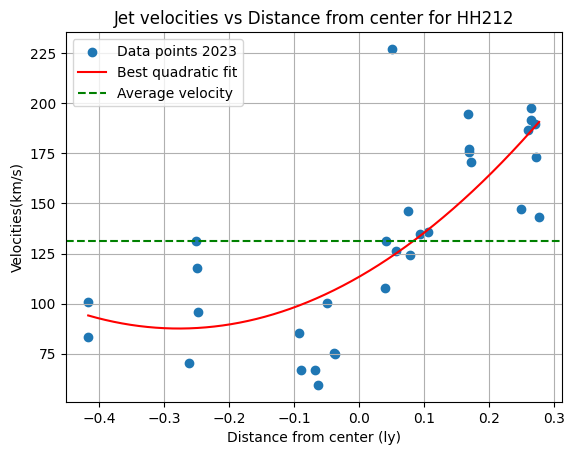

In [81]:

plt.scatter(distance_from_center, velocities, label='Data points 2023')
plt.plot(x_fit, y_fit, color='red', label='Best quadratic fit')
plt.axhline(y=v_mean, color='green', linestyle='--', label='Average velocity')
plt.xlabel('Distance from center (ly)')
plt.ylabel('Velocities(km/s)')
plt.title('Jet velocities vs Distance from center for HH212')
plt.legend()
plt.grid(True)
plt.show()

In [82]:
distance_from_center

[np.float64(0.056345556711235804),
 np.float64(0.041635201342932915),
 np.float64(0.04993811531868131),
 np.float64(0.03947285068060198),
 np.float64(0.07490678728025328),
 np.float64(0.0775372830005341),
 np.float64(0.09317696884760582),
 np.float64(0.10514365084402862),
 np.float64(0.1677359712785234),
 np.float64(0.17117660119214667),
 np.float64(0.16879939352240964),
 np.float64(0.1688568152724199),
 np.float64(0.2489141706108259),
 np.float64(0.27638625269224965),
 np.float64(0.2718464851289341),
 np.float64(0.26464835215219523),
 np.float64(0.2590828503097967),
 np.float64(0.27031853032790326),
 np.float64(0.26421518059817756),
 np.float64(-0.04945336474704089),
 np.float64(-0.037674771676400216),
 np.float64(-0.038478979851976416),
 np.float64(-0.06411766878792283),
 np.float64(-0.06819186079144335),
 np.float64(-0.09038257226376564),
 np.float64(-0.09310107596881642),
 np.float64(-0.2619745636360719),
 np.float64(-0.24912280262667133),
 np.float64(-0.2511951549956917),
 np.floa

In [83]:
index = distance_from_center.index(-0.04945336474704089)
print(index)

19


In [84]:
velocities

[np.float64(126.24455664116742),
 np.float64(131.12743397033358),
 np.float64(227.04623214404864),
 np.float64(107.68752209601027),
 np.float64(146.06500954759372),
 np.float64(124.18275468330575),
 np.float64(134.6977078937249),
 np.float64(135.60391466862694),
 np.float64(194.59796772672715),
 np.float64(170.6323066762755),
 np.float64(177.04483107405653),
 np.float64(175.54759928514594),
 np.float64(147.24667483826917),
 np.float64(143.01148668454007),
 np.float64(172.94373371688783),
 np.float64(197.47241989654304),
 np.float64(186.68344599597089),
 np.float64(189.46880486609345),
 np.float64(191.49831448893192),
 np.float64(100.3472703781399),
 np.float64(74.70681436625563),
 np.float64(75.36438168755672),
 np.float64(59.465433820613654),
 np.float64(67.1425063504621),
 np.float64(66.86904954748685),
 np.float64(85.48933710439191),
 np.float64(70.21023485874528),
 np.float64(117.85816966154083),
 np.float64(131.19192825692622),
 np.float64(96.05206815546502),
 np.float64(100.79068

In [85]:
accelerations = []

In [86]:
kmsInLightYear = 	9460730472580

In [87]:
for i in range(len(distance_from_center)):
  acceleration = (pow(velocities[i],2) - pow(((velocities[0]+velocities[22])/2) , 2))/ (2*distance_from_center[i]*kmsInLightYear)
  accelerations.append(acceleration)

In [88]:
accelerations

[np.float64(6.861796970037062e-09),
 np.float64(1.088139942191767e-08),
 np.float64(4.5431099636217465e-08),
 np.float64(3.982616130089417e-09),
 np.float64(8.969537586295543e-09),
 np.float64(4.634462467665731e-09),
 np.float64(5.400557408820883e-09),
 np.float64(4.909028160093717e-09),
 np.float64(9.214893871033584e-09),
 np.float64(6.327228989867241e-09),
 np.float64(7.1143744592155426e-09),
 np.float64(6.946725185123379e-09),
 np.float64(2.7728307627199927e-09),
 np.float64(2.2621545635513396e-09),
 np.float64(4.1385286396298585e-09),
 np.float64(6.065522422652318e-09),
 np.float64(5.350356896909269e-09),
 np.float64(5.332811282176333e-09),
 np.float64(5.610654587578797e-09),
 np.float64(-1.5469469534521667e-09),
 np.float64(4.265823142763067e-09),
 np.float64(4.041130254045923e-09),
 np.float64(4.192146771309128e-09),
 np.float64(3.1883802537711096e-09),
 np.float64(2.42699824966735e-09),
 np.float64(7.456954684091125e-10),
 np.float64(7.449297272179055e-10),
 np.float64(-1.117683

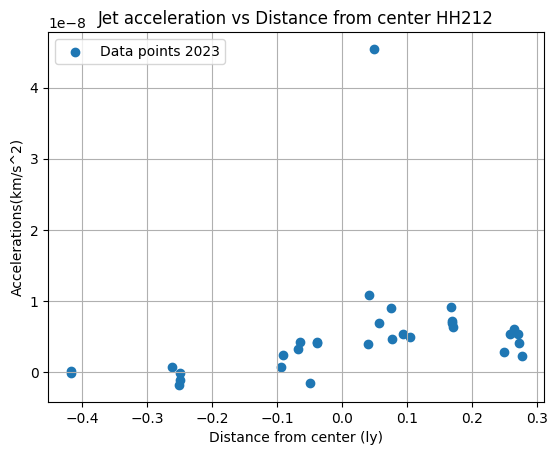

In [89]:
plt.scatter(distance_from_center, accelerations, label='Data points 2023')
plt.xlabel('Distance from center (ly)')
plt.ylabel('Accelerations(km/s^2)')
plt.title('Jet acceleration vs Distance from center HH212')
plt.legend()
plt.grid(True)
plt.show()

In [90]:
#plot both of them together
distance_from_center_prev = [np.float64(0.038264373140406906),
 np.float64(0.04854251232599226),
 np.float64(0.0545397266270347),
 np.float64(0.09092007164553594),
 np.float64(0.10255630423952804),
 np.float64(0.053450578395101776),
 np.float64(0.07824204175652295),
 np.float64(0.073573929074465),
 np.float64(0.10289997219270536),
 np.float64(0.10498529348927628),
 np.float64(0.16510038659661364),
 np.float64(0.17104586325089488),
 np.float64(0.15834693193281354),
 np.float64(0.17032291540047773),
 np.float64(0.1687947832958396),
 np.float64(0.2692450222908497),
 np.float64(0.2673375223036669),
 np.float64(0.258977883401288),
 np.float64(0.24864666845941283),
 np.float64(0.2763682971597647),
 np.float64(0.2667475149828397),
 np.float64(0.26320307853157465),
 np.float64(-0.05215825853831185),
 np.float64(-0.03917379257495412),
 np.float64(-0.03918253790656911),
 np.float64(-0.06713575781593195),
 np.float64(-0.0670996118517467),
 np.float64(-0.06409739999490009),
 np.float64(-0.047541231538367826),
 np.float64(-0.09315107996315045),
 np.float64(-0.08884890121421563),
 np.float64(-0.09282408868978735),
 np.float64(-0.09256017026991417),
 np.float64(-0.2505081860409322),
 np.float64(-0.24950794171919174),
 np.float64(-0.25290458825780626),
 np.float64(-0.26427055189507576),
 np.float64(-0.26116151042847885),
 np.float64(-0.25125410794849123),
 np.float64(-0.25280656656046707)]

In [91]:
velocities_prev = [np.float64(97.55789864124593),
 np.float64(173.13905005207283),
 np.float64(118.26495497799368),
 np.float64(111.98417444883303),
 np.float64(165.85383466900205),
 np.float64(199.28085289335127),
 np.float64(138.7931266659367),
 np.float64(134.9943497561939),
 np.float64(148.2743501267893),
 np.float64(140.98205396021092),
 np.float64(156.35907281666735),
 np.float64(176.85193937880254),
 np.float64(89.07519776913972),
 np.float64(175.50182482296353),
 np.float64(171.7790067512079),
 np.float64(158.45619187464985),
 np.float64(188.85372018776323),
 np.float64(192.58314103119162),
 np.float64(148.61229994742172),
 np.float64(147.3533483959961),
 np.float64(132.26973814727583),
 np.float64(203.98165232901883),
 np.float64(137.58333884456272),
 np.float64(97.20049752282615),
 np.float64(88.31180262619829),
 np.float64(96.10928038279218),
 np.float64(58.395457426658105),
 np.float64(61.851364665668925),
 np.float64(103.09586963675845),
 np.float64(90.1084746606848),
 np.float64(51.63207959405353),
 np.float64(88.42800703761279),
 np.float64(78.71308910926619),
 np.float64(128.69040329627072),
 np.float64(150.96316171784534),
 np.float64(157.2108064251601),
 np.float64(99.3217505577421),
 np.float64(147.42628513805377),
 np.float64(139.19658271761796),
 np.float64(151.02575770388745)]

In [92]:
accelerations_prev = [np.float64(-5.946409818569862e-09),
 np.float64(1.758776677507005e-08),
 np.float64(1.586761019360866e-10),
 np.float64(-7.454309198736575e-10),
 np.float64(7.052067796384373e-09),
 np.float64(2.559912428020608e-08),
 np.float64(3.6750095465993658e-09),
 np.float64(3.1610812250332675e-09),
 np.float64(4.192274201366826e-09),
 np.float64(3.0471507315084854e-09),
 np.float64(3.4012521053502214e-09),
 np.float64(5.392891849794293e-09),
 np.float64(-1.965338564682884e-09),
 np.float64(5.268170325059393e-09),
 np.float64(4.911065556283615e-09),
 np.float64(2.2152309410928285e-09),
 np.float64(4.318125502592378e-09),
 np.float64(4.7478115892419115e-09),
 np.float64(1.7562571563634816e-09),
 np.float64(1.5088388601476025e-09),
 np.float64(7.276103388766364e-10),
 np.float64(5.579241376374283e-09),
 np.float64(5.1740507218223614e-09),
 np.float64(-5.902271770339922e-09),
 np.float64(-8.125101383847748e-09),
 np.float64(-3.61003913965235e-09),
 np.float64(-8.201508263691102e-09),
 np.float64(-8.24301078279221e-09),
 np.float64(-3.550768309205822e-09),
 np.float64(-3.2358222774229026e-09),
 np.float64(-6.636511921404359e-09),
 np.float64(-3.4180423009439494e-09),
 np.float64(-4.354924494969788e-09),
 np.float64(5.777174192570019e-10),
 np.float64(1.8993691520428515e-09),
 np.float64(2.276206711632149e-09),
 np.float64(-7.915471140330314e-10),
 np.float64(1.6010457120621008e-09),
 np.float64(1.1680116810777103e-09),
 np.float64(1.8785379432124704e-09)]

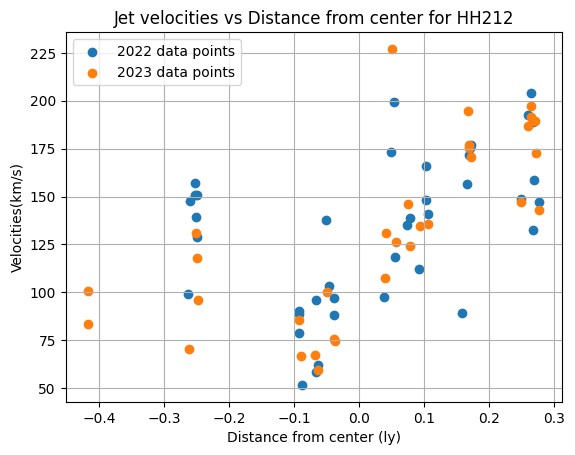

In [93]:

plt.scatter(distance_from_center_prev, velocities_prev, label='2022 data points')
plt.scatter(distance_from_center, velocities, label='2023 data points')
plt.xlabel('Distance from center (ly)')
plt.ylabel('Velocities(km/s)')
plt.title('Jet velocities vs Distance from center for HH212')
plt.legend()
plt.grid(True)
plt.show()

In [94]:
distance_from_center_prev =[np.float64(0.038264373140406906),

 np.float64(0.0545397266270347),
 np.float64(0.09092007164553594),
 np.float64(0.053450578395101776),
 np.float64(0.07824204175652295),
 np.float64(0.073573929074465),
 np.float64(0.10289997219270536),
 np.float64(0.10498529348927628),
 np.float64(0.16510038659661364),
 np.float64(0.17104586325089488),
 np.float64(0.15834693193281354),
 np.float64(0.17032291540047773),
 np.float64(0.1687947832958396),
 np.float64(0.2692450222908497),
 np.float64(0.2673375223036669),
 np.float64(0.258977883401288),
 np.float64(0.24864666845941283),
 np.float64(0.2763682971597647),
 np.float64(0.2667475149828397),
 np.float64(0.26320307853157465),
 np.float64(-0.05215825853831185),
 np.float64(-0.03917379257495412),
 np.float64(-0.03918253790656911),
 np.float64(-0.06713575781593195),
 np.float64(-0.0670996118517467),
 np.float64(-0.06409739999490009),
 np.float64(-0.047541231538367826),
 np.float64(-0.09315107996315045),
 np.float64(-0.08884890121421563),
 np.float64(-0.09282408868978735),
 np.float64(-0.09256017026991417),
 np.float64(-0.2505081860409322),
 np.float64(-0.24950794171919174),
 np.float64(-0.25290458825780626),
 np.float64(-0.26427055189507576),
 np.float64(-0.26116151042847885),
 np.float64(-0.25125410794849123),
 np.float64(-0.25280656656046707)]


In [95]:
accelerations_prev

[np.float64(-5.946409818569862e-09),
 np.float64(1.758776677507005e-08),
 np.float64(1.586761019360866e-10),
 np.float64(-7.454309198736575e-10),
 np.float64(7.052067796384373e-09),
 np.float64(2.559912428020608e-08),
 np.float64(3.6750095465993658e-09),
 np.float64(3.1610812250332675e-09),
 np.float64(4.192274201366826e-09),
 np.float64(3.0471507315084854e-09),
 np.float64(3.4012521053502214e-09),
 np.float64(5.392891849794293e-09),
 np.float64(-1.965338564682884e-09),
 np.float64(5.268170325059393e-09),
 np.float64(4.911065556283615e-09),
 np.float64(2.2152309410928285e-09),
 np.float64(4.318125502592378e-09),
 np.float64(4.7478115892419115e-09),
 np.float64(1.7562571563634816e-09),
 np.float64(1.5088388601476025e-09),
 np.float64(7.276103388766364e-10),
 np.float64(5.579241376374283e-09),
 np.float64(5.1740507218223614e-09),
 np.float64(-5.902271770339922e-09),
 np.float64(-8.125101383847748e-09),
 np.float64(-3.61003913965235e-09),
 np.float64(-8.201508263691102e-09),
 np.float64(-

In [96]:
accelerations_prev = [np.float64(-5.946409818569862e-09),
 np.float64(1.586761019360866e-10),
 np.float64(-7.454309198736575e-10),
 np.float64(7.052067796384373e-09),
 np.float64(3.6750095465993658e-09),
 np.float64(3.1610812250332675e-09),
 np.float64(4.192274201366826e-09),
 np.float64(3.0471507315084854e-09),
 np.float64(3.4012521053502214e-09),
 np.float64(5.392891849794293e-09),
 np.float64(-1.965338564682884e-09),
 np.float64(5.268170325059393e-09),
 np.float64(4.911065556283615e-09),
 np.float64(2.2152309410928285e-09),
 np.float64(4.318125502592378e-09),
 np.float64(4.7478115892419115e-09),
 np.float64(1.7562571563634816e-09),
 np.float64(1.5088388601476025e-09),
 np.float64(7.276103388766364e-10),
 np.float64(5.579241376374283e-09),
 np.float64(5.1740507218223614e-09),
 np.float64(-5.902271770339922e-09),
 np.float64(-8.125101383847748e-09),
 np.float64(-3.61003913965235e-09),
 np.float64(-8.201508263691102e-09),
 np.float64(-8.24301078279221e-09),
 np.float64(-3.550768309205822e-09),
 np.float64(-3.2358222774229026e-09),
 np.float64(-6.636511921404359e-09),
 np.float64(-3.4180423009439494e-09),
 np.float64(-4.354924494969788e-09),
 np.float64(5.777174192570019e-10),
 np.float64(1.8993691520428515e-09),
 np.float64(2.276206711632149e-09),
 np.float64(-7.915471140330314e-10),
 np.float64(1.6010457120621008e-09),
 np.float64(1.1680116810777103e-09),
 np.float64(1.8785379432124704e-09)]

In [97]:
len(accelerations_prev)

38

In [98]:
len(distance_from_center_prev)

38

In [99]:
max(accelerations_prev)

np.float64(7.052067796384373e-09)

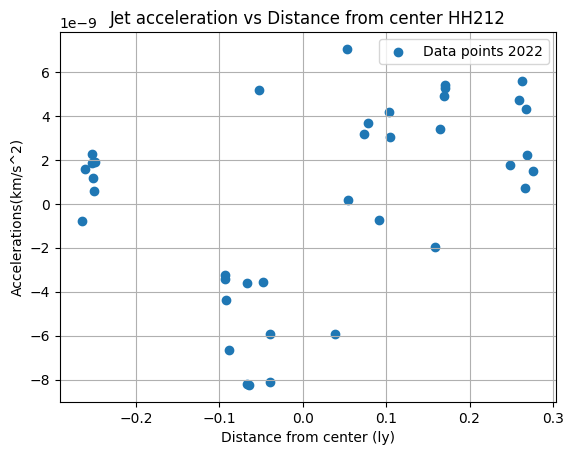

In [100]:
# plt.scatter(distance_from_center, accelerations, label='Data points 2023')
plt.scatter(distance_from_center_prev,accelerations_prev, label='Data points 2022')
plt.xlabel('Distance from center (ly)')
plt.ylabel('Accelerations(km/s^2)')
plt.title('Jet acceleration vs Distance from center HH212')
plt.legend()
plt.grid(True)
plt.show()

In [101]:
(131.48740699905346 + 132.40164471768466)/2

131.94452585836905